<a href="https://colab.research.google.com/github/YounSooKimTech/self_study/blob/main/UN_RISKS_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df= pd.read_excel("/content/Service_Risk_Labeled (4).xlsx")
df.head(2)

,COUNTRY,Max of REVIEW_YEAR,RISK_DESCRIPTION,Standard_risk_L2,Standard_risk_L1,LIKEHOOD,IMPACT,OVERALL_RISK,RISK_TREATMENT,MITIGATION_MEASURES,COMMON_SERVICE_LINE,COMMON_SERVICE_CATEGORY,COMMON_SERVICE,Language,translated,text
0,Afghanistan,2023,A funding cut imposed by the legislative bodies,Funding,"2. Operational factors (funding, capacity and ...",Possible,Significant Concern,High,Accept,Adjust programme delivery according to the fun...,Common Administration services and including c...,Premises management,Management of common premises,en,A funding cut imposed by the legislative bodies,funding cut impose legislative body
1,Afghanistan,2023,A funding cut imposed by the legislative bodies,Funding,"2. Operational factors (funding, capacity and ...",Possible,Significant Concern,High,Accept,Adjust programme delivery according to the fun...,Common Administration services and including c...,Premises management,Management of common premises,en,A funding cut imposed by the legislative bodies,funding cut impose legislative body


In [ ]:
print(f"the data has {df.shape} and it has {len(df['COUNTRY'].unique())} countries")

the data has (945, 16) and it has 85 countries


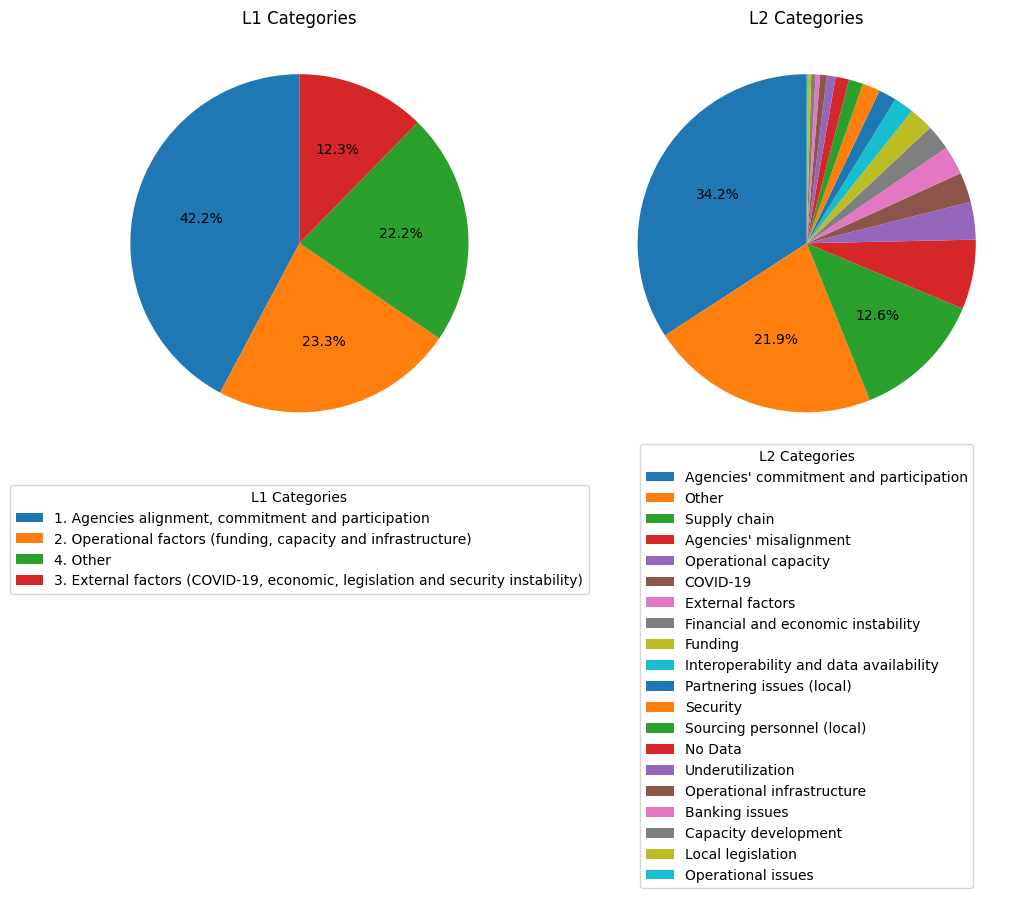

In [ ]:
l1_counts = df["Standard_risk_L1"].value_counts()
l2_counts = df["Standard_risk_L2"].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))


# l1 pie graph
l1_pie = axs[0].pie(l1_counts, labels=None, autopct='%1.1f%%', startangle=90)
axs[0].set_title("L1 Categories")

# l2_pie graph
def autopct_func(pct):
    return f'{pct:.1f}%' if pct > 10 else ''

l2_pie = axs[1].pie(l2_counts, labels=None, autopct=autopct_func, startangle=90)
axs[1].set_title("L2 Categories")


# legend
axs[0].legend(l1_counts.index, title="L1 Categories", loc="center", bbox_to_anchor=(0.5, -0.2))
axs[1].legend(l2_counts.index, title="L2 Categories", loc="center", bbox_to_anchor=(0.5, -0.5))


plt.show()

In [ ]:
unique_l1_categories

array(['2. Operational factors (funding, capacity and infrastructure)',
       '4. Other',
       '3. External factors (COVID-19, economic, legislation and security instability)',
       '1. Agencies alignment, commitment and participation', nan],
      dtype=object)

In [ ]:
unique_l1_categories = df["Standard_risk_L1"].unique()
unique_l1_categories

array(['2. Operational factors (funding, capacity and infrastructure)',
       '4. Other',
       '3. External factors (COVID-19, economic, legislation and security instability)',
       '1. Agencies alignment, commitment and participation', nan],
      dtype=object)

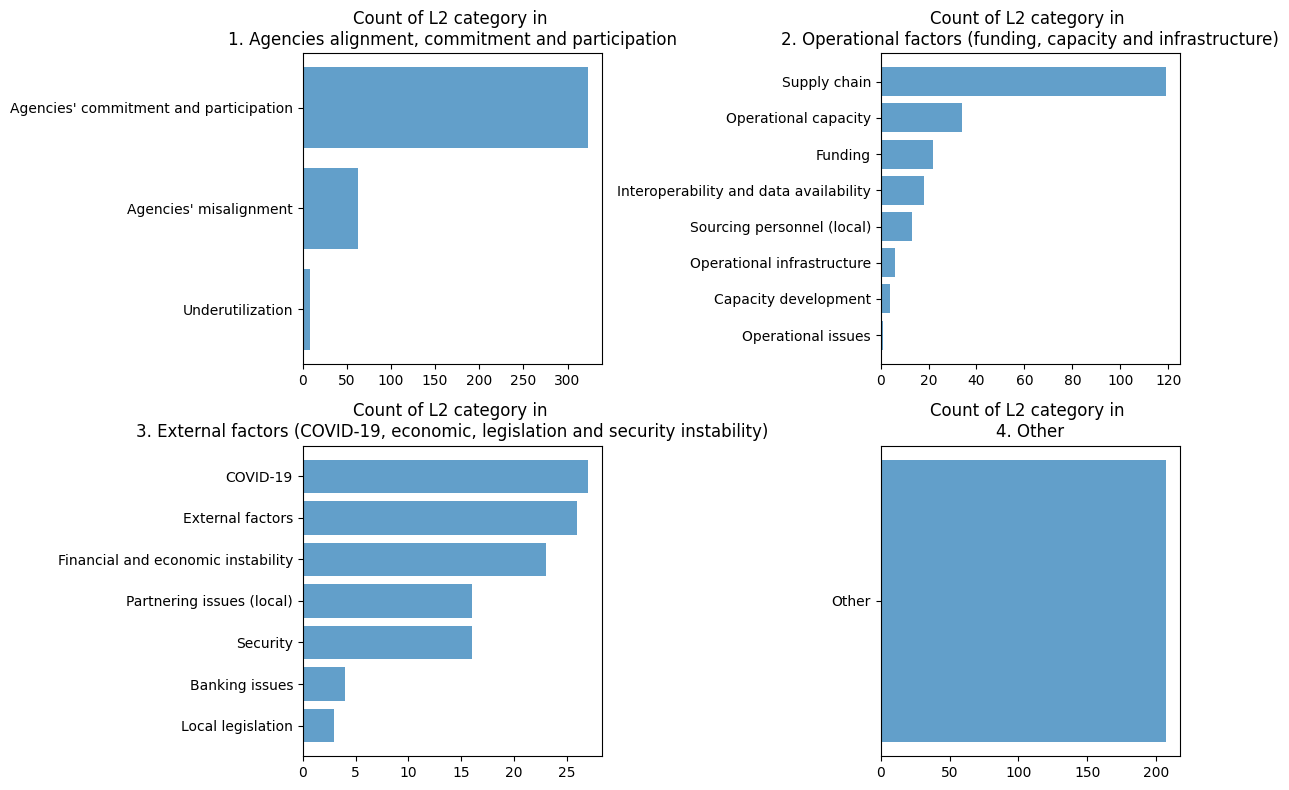

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get unique L1 categories
unique_l1_categories = [
    '1. Agencies alignment, commitment and participation',
    '2. Operational factors (funding, capacity and infrastructure)',
       '3. External factors (COVID-19, economic, legislation and security instability)','4. Other'
       ]

# Create subplots for each L1 category in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, l1_category in enumerate(unique_l1_categories):
    if i < 4:
        # Calculate the row and column index for the current subplot
        row = i // 2
        col = i % 2

        # Filter the DataFrame for the current L1 category
        subset = df[df["Standard_risk_L1"] == l1_category]

        # Count the occurrences of each L2 category in the subset
        l2_counts = subset["Standard_risk_L2"].value_counts().sort_values(ascending=True)

        # Create a bar chart for the current L1 category in the specified subplot
        axs[row, col].barh(l2_counts.index, l2_counts.values, alpha=0.7)
        axs[row, col].set_title(f"Count of L2 category in \n{l1_category}")
        # axs[row, col].tick_params(axis='x', rotation=90)

# Adjust layout and spacing
plt.tight_layout()

# Show the subplots
plt.show()


In [ ]:
df.columns

Index(['COUNTRY', 'Max of REVIEW_YEAR', 'RISK_DESCRIPTION', 'Standard_risk_L2',
       'Standard_risk_L1', 'LIKEHOOD', 'IMPACT', 'OVERALL_RISK',
       'RISK_TREATMENT', 'MITIGATION_MEASURES', 'COMMON_SERVICE_LINE',
       'COMMON_SERVICE_CATEGORY', 'COMMON_SERVICE', 'Language', 'translated',
       'text'],
      dtype='object')

In [ ]:
print(f"# of Common Service Line: {len(df['COMMON_SERVICE_LINE'].unique())}")
print(f"# of Common Service category: {len(df['COMMON_SERVICE_CATEGORY'].unique())}")
print(f"# of Common Service: {len(df['COMMON_SERVICE'].unique())}")

df['COMMON_SERVICE_LINE'].unique()

# of Common Service Line: 6
# of Common Service category: 29
# of Common Service: 181


array(['Common Administration services and including common Facilities/Premises',
       'Common Procurement services', 'Common ICT services',
       'Common Finance services', 'Common Human Resources services',
       'Common Logistics services'], dtype=object)

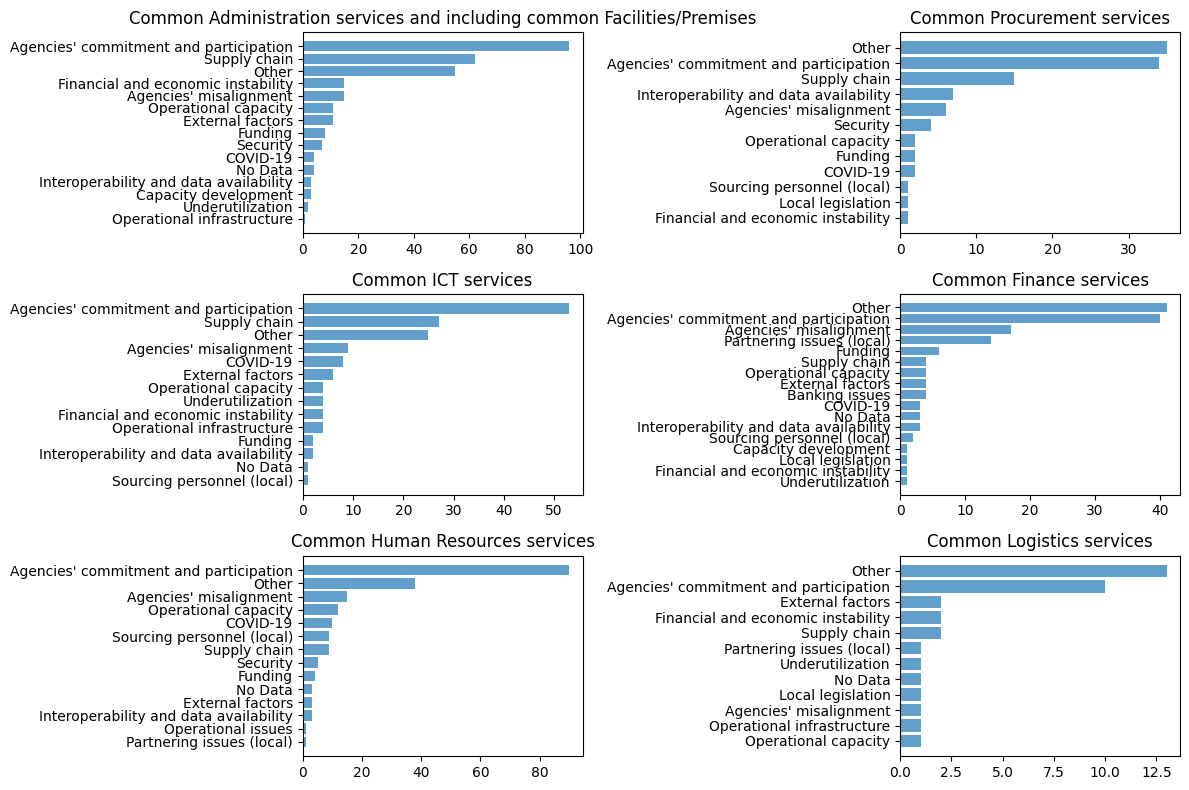

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

unique_common_service_categories = df["COMMON_SERVICE_LINE"].unique()

# Create subplots for each L1 category in a 2x2 grid
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

for i, service_category in enumerate(unique_common_service_categories):
    if i < 6:
        # Calculate the row and column index for the current subplot
        row = i // 2
        col = i % 2
        subset = df[df["COMMON_SERVICE_LINE"] == service_category]

        # Count the occurrences of each L2 category in the subset
        l2_counts = subset["Standard_risk_L2"].value_counts().sort_values(ascending=True)

        # Create a horizontal bar chart for the current COMMON_SERVICE_LINE category in the specified subplot
        axs[row, col].barh(l2_counts.index, l2_counts.values, alpha=0.7)
        axs[row, col].set_title(f"{service_category}")


# Adjust layout and spacing
plt.tight_layout()

# Show the subplots
plt.show()
